# NLP fundamentals in Python

DataCamp with Katharine Jarmul - founder of kjamistan

NLP (natural language processing)

NLP basics:
- topic identification
- text classification

NLP applications:
- chatbots
- translation
- sentiment analysis
- ...

## Issues
- problem installing pycld2 for polyglot

# 1. Regular expressions & word tokenization
- parsing text
- handle non-English text

In [ ]:
import re

# match pattern on string
re.match('abc', 'abcdef')

# match word
word_regex = '\w+'
re.match(word_regex, 'hi there!')

# split on spaces for tokenization
re.split('\s+', 'Split on spaces.')
# ['Split', 'on', 'spaces.']

## 1.1 Regex 

### 1.1.a Common Regex patterns
- \w+ matches word
- \d matches digit
- \s matches space
- .* wildcard
- # + or * greedy match
- \S matches 'not space'
- [a-z] lowercase group using brackets


### 1.1.b re package/module
- split - split a string on regex
- findall - find all patterns in a string
- search - search for a pattern
- match - match an entire string or substring based on a pattern

Notes:
- pass the pattern first and string second
- may return an iterator, string, or match object

### 1.1.b Which pattern?
Which of the following Regex patterns results in the following text?
- my_string = "Let's write RegEx!"
- re.findall(PATTERN, my_string)
- ['Let', 's', 'write', 'RegEx']

In the IPython Shell, try replacing PATTERN with one of the below options and observe the resulting output. The re module has been pre-imported for you and my_string is available in your namespace. 

Answer:
- re.findall(r"\w+", my_string)

## 1.1.c Practicing regular expressions: re.split() and re.findall()
Now you'll get a chance to write some regular expressions to match digits, strings and non-alphanumeric characters. Take a look at my_string first by printing it in the IPython Shell, to determine how you might best match the different steps.

Note: It's important to prefix your regex patterns with r to ensure that your patterns are interpreted in the way you want them to. Else, you may encounter problems to do with escape sequences in strings. For example, "\n" in Python is used to indicate a new line, but if you use the r prefix, it will be interpreted as the raw string "\n" - that is, the character "\" followed by the character "n" - and not as a new line.

In [ ]:
# Import the regex module
import re

# Write a pattern to match sentence endings: sentence_endings
# match sentence endings (., ?, and !)
sentence_endings = r"[.?!]"

# Split my_string on sentence endings and print the result
print(re.split(sentence_endings, my_string))

# Find all capitalized words in my_string and print the result
capitalized_words = r"[A-Z]\w+"
print(re.findall(capitalized_words, my_string))

# Split my_string on spaces and print the result
spaces = r"\s+"
print(re.split(spaces, my_string))

# Find all digits in my_string and print the result
digits = r"\d+"
print(re.findall(digits, my_string))

## 1.2 Tokenization
What is tokenization?
- turning a string or document into tokens (smaller chunks)
- one step in preparing a text for NLP
- many theories and rules
- you can create your own rules using regex
- Examples:
    - breaking out words or sentences
    - separating punctuation
    - separating all hashtags in a tweet
    
nltk library = natural language toolkit

Reasons to tokenize?
- easier to map part of speech
- matching common words
- removing unwanted tokens

### 1.2.a nltk library
some nltk tokenizers
- sent_tokenize: tokenize a document into sentences
- regexp_tokenize: tokenize a string or document based on a regex pattern
- TweetTokenizer: special class just for tweet tokenization, allowing you to separate hashtags, mentions, and lots of exclamation points!!!

In [ ]:
from nltk.tokenize import word_tokenize

# separate words and punctuation
word_tokenize("Hi there!")
# output
# ['Hi', 'there', '!']

### 1.2.b Difference b/n re.search() and re.match()
- match starts from beginning of string

Follow this rule:
- if you look for a pattern that might not be at the beginning of a string, use search()
- if you want the entire string or just the beginning, use match()


In [ ]:
import re

# same results
rematch('abc', 'abcde')
re.search('abc', 'abcde')

# different results
re.match('cd', 'abcde')
# no result
re.search('cd', 'abcde')

### 1.2.c Word tokenization with NLTK
Here, you'll be using the first scene of Monty Python's Holy Grail, which has been pre-loaded as scene_one. Feel free to check it out in the IPython Shell!

Your job in this exercise is to utilize word_tokenize and sent_tokenize from nltk.tokenize to tokenize both words and sentences from Python strings - in this case, the first scene of Monty Python's Holy Grail.

In [ ]:
# Import necessary modules
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize

# Split scene_one into sentences: sentences
sentences = sent_tokenize(scene_one)

# Use word_tokenize to tokenize the fourth sentence: tokenized_sent
tokenized_sent = word_tokenize(sentences[3])

# Make a set of unique tokens in the entire scene: unique_tokens
unique_tokens = set(word_tokenize(scene_one))

# Print the unique tokens result
print(unique_tokens)

### 1.2.d More regex with re.search()
In this exercise, you'll utilize re.search() and re.match() to find specific tokens. Both search and match expect regex patterns, similar to those you defined in an earlier exercise. You'll apply these regex library methods to the same Monty Python text from the nltk corpora.

You have both scene_one and sentences available from the last exercise; now you can use them with re.search() and re.match() to extract and match more text.

In [ ]:
# Search for the first occurrence of "coconuts" in scene_one: match
match = re.search("coconuts", scene_one)

# Print the start and end indexes of match
print(match.start(), match.end())

# Write a regular expression to search for anything in 
# square brackets: pattern1
pattern1 = r"\[.*]"

# Use re.search to find the first text in square brackets
print(re.search(pattern1, scene_one))

# Find the script notation at the beginning of the fourth sentence 
# and print it
pattern2 = r"[\w\s]+:"
print(re.match(pattern2, sentences[3]))

## 1.3 Advanced Tokenization with Regex
Regex groups using or "|" character
- OR is represented using |
- you can define a group using ()
- define explicit character ranges using []


In [ ]:
# example: all digitis or words
import re
match_digits_and_words = ('\d+|\w+')
re.findall(match_digits_and_words, 'He has 11 cats.')

Regex ranges and groups
- Pattern, matches, example
- [A-Za-z]+, upper and lowercase English, 'ABCDEFghijk'
- [0-9], numbers 0-9, 9
- [A-Za-z\.\]+m, upper and lowercase English alphabet,
- (a-z), a, - and z, 'a-z'
- (\s+|,), spaces or comma, ',


In [ ]:
# Character range with re.match()
import re
my_str = 'match lowercase spaces nums like 12, but no comma'
re.match('[a-z0-9 ]+', my_str)

### 1.3.a Choosing a tokenizer
Given the following string, which of the below patterns is the best tokenizer? If possible, you want to retain sentence punctuation as separate tokens, but have '#1' remain a single token.
- my_string = "SOLDIER #1: Found them? In Mercea? The coconut's tropical!"

The string is available in your workspace as my_string, and the patterns have been pre-loaded as pattern1, pattern2, pattern3, and pattern4, respectively.
- pattern1 = r"\w+(\?!)"
- pattern2 = r"(\w+|#\d|\?|!)"
- pattern3 = r"(#\d\w+\?!)"
- pattern4 = r"\s+"

Additionally, regexp_tokenize has been imported from nltk.tokenize. You can use regexp_tokenize() with my_string and one of the patterns as arguments to experiment for yourself and see which is the best tokenizer.
- regexp_tokenize(string, pattern)

Answer: pattern 2

In [ ]:
from nltk.tokenize import regexp_tokenize

In [11]: regexp_tokenize(pattern1, my_string)
Out[11]: []

In [12]: regexp_tokenize(my_string, pattern1)
Out[12]: []

In [13]: regexp_tokenize(my_string, pattern2)
Out[13]: 
['SOLDIER',
 '#1',
 'Found',
 'them',
 '?',
 'In',
 'Mercea',
 '?',
 'The',
 'coconut',
 's',
 'tropical',
 '!']

In [14]: regexp_tokenize(my_string, pattern3)
Out[14]: []

In [15]: regexp_tokenize(my_string, pattern4)
Out[15]: [' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']

### 1.3.b Regex with NLTK tokenization
Twitter is a frequently used source for NLP text and tasks. In this exercise, you'll build a more complex tokenizer for tweets with hashtags and mentions using nltk and regex. The nltk.tokenize.TweetTokenizer class gives you some extra methods and attributes for parsing tweets.

Here, you're given some example tweets to parse using both TweetTokenizer and regexp_tokenize from the nltk.tokenize module. These example tweets have been pre-loaded into the variable tweets. Feel free to explore it in the IPython Shell!

In [ ]:
# Import the necessary modules
from nltk.tokenize import regexp_tokenize
from nltk.tokenize import TweetTokenizer

# Define a regex pattern to find hashtags: pattern1
pattern1 = r"#\w+"

# Use the pattern on the first tweet in the tweets list
regexp_tokenize(tweets[0], pattern1)

# Write a pattern that matches both mentions and hashtags
# mention example: @example
pattern2 = r"([@|#]\w+)"

# Use the pattern on the last tweet in the tweets list
regexp_tokenize(tweets[-1], pattern2)

# Use the TweetTokenizer to tokenize all tweets into one list
tknzr = TweetTokenizer()
all_tokens = [tknzr.tokenize(t) for t in tweets]
print(all_tokens)

### 1.3.c Non-ascii tokenization
In this exercise, you'll practice advanced tokenization by tokenizing some non-ascii based text. You'll be using German with emoji!

Here, you have access to a string called german_text, which has been printed for you in the Shell. Notice the emoji and the German characters!

The following modules have been pre-imported from nltk.tokenize: regexp_tokenize and word_tokenize.

Unicode ranges for emoji are:
- ('\U0001F300'-'\U0001F5FF'), ('\U0001F600-\U0001F64F'), ('\U0001F680-\U0001F6FF'), and ('\u2600'-\u26FF-\u2700-\u27BF').

In [ ]:
# Tokenize and print all words in german_text
all_words = word_tokenize(german_text)
print(all_words)

# Tokenize and print only capital words
capital_words = r"[A-Z|Ü]\w+"
print(regexp_tokenize(german_text, capital_words))

# Tokenize and print only emoji
emoji = "['\U0001F300-\U0001F5FF'|'\U0001F600-\U0001F64F'| \
'\U0001F680-\U0001F6FF'|'\u2600-\u26FF\u2700-\u27BF']"
print(regexp_tokenize(german_text, emoji))

Wann gehen wir Pizza essen? 🍕 Und fährst du mit Über? 🚕

In [1]: all_words = word_tokenize(german_text)
        print(all_words)
- ['Wann', 'gehen', 'wir', 'Pizza', 'essen', '?', '🍕', 'Und', 'fährst', 'du', 'mit', 'Über', '?', '🚕']


In [2]: capital_words = r"[A-Z|Ü]\w+"
        print(regexp_tokenize(german_text, capital_words))
- ['Wann', 'Pizza', 'Und', 'Über']

In [3]: emoji = "['\U0001F300-\U0001F5FF'|'\U0001F600-\U0001F64F'|'\U0001F680-\U0001F6FF'|'\u2600-\u26FF\u2700-\u27BF']"
        print(regexp_tokenize(german_text, emoji))
- ['🍕', '🚕']

## 1.4 Charting word length with nltk

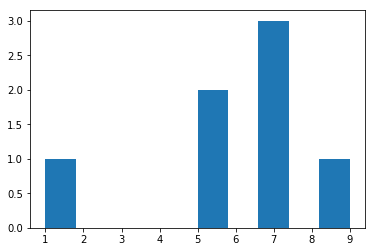

In [3]:
# example histogram with matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

# load arry and plot histogram
plt.hist([1,5,5,7,7,7,9])
plt.show()

### 1.4.a Combining NLP data extraction with plotting

In [10]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /Users/joe/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /Users/joe/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /Users/joe/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /Users/joe/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to
[nltk_data]    |     /Users/joe/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to
[nltk_data]    |     /Users/joe/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to
[nltk_data]    |     /Users/joe/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_es

[nltk_data]    |   Unzipping corpora/smultron.zip.
[nltk_data]    | Downloading package state_union to
[nltk_data]    |     /Users/joe/nltk_data...
[nltk_data]    |   Unzipping corpora/state_union.zip.
[nltk_data]    | Downloading package stopwords to
[nltk_data]    |     /Users/joe/nltk_data...
[nltk_data]    |   Unzipping corpora/stopwords.zip.
[nltk_data]    | Downloading package subjectivity to
[nltk_data]    |     /Users/joe/nltk_data...
[nltk_data]    |   Unzipping corpora/subjectivity.zip.
[nltk_data]    | Downloading package swadesh to
[nltk_data]    |     /Users/joe/nltk_data...
[nltk_data]    |   Unzipping corpora/swadesh.zip.
[nltk_data]    | Downloading package switchboard to
[nltk_data]    |     /Users/joe/nltk_data...
[nltk_data]    |   Unzipping corpora/switchboard.zip.
[nltk_data]    | Downloading package timit to /Users/joe/nltk_data...
[nltk_data]    |   Unzipping corpora/timit.zip.
[nltk_data]    | Downloading package toolbox to
[nltk_data]    |     /Users/joe/nltk_d

True

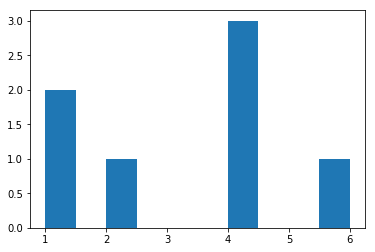

In [11]:
from matplotlib import pyplot as plt
from nltk.tokenize import word_tokenize

words = word_tokenize("This is a pretty cool tool!")
# make a list of word lengths
word_lengths = [len(w) for w in words]

plt.hist(word_lengths)
plt.show()

# see 4 letter words is the most common

### 1.4.a Charting practice
Try using your new skills to find and chart the number of words per line in the script using matplotlib. The Holy Grail script is loaded for you, and you need to use regex to find the words per line.

Using list comprehensions here will speed up your computations. For example: my_lines = [tokenize(l) for l in lines] will call a function tokenize on each line in the list lines. The new transformed list will be saved in the my_lines variable.

You have access to the entire script in the variable holy_grail. Go for it!

In [ ]:
# Split the script into lines: lines
lines = holy_grail.split('\n')

# Replace all script lines for speaker (ie. remove ARTHUR:)
pattern = "[A-Z]{2,}(\s)?(#\d)?([A-Z]{2,})?:"
lines = [re.sub(pattern, '', l) for l in lines]

# Tokenize each line: tokenized_lines
# Keep only words in each line
tokenized_lines = [regexp_tokenize(s, "\w+") for s in lines]

# Make a frequency list of lengths: line_num_words
line_num_words = [len(t_line) for t_line in tokenized_lines]

# Plot a histogram of the line lengths
plt.hist(line_num_words)

# Show the plot (see below)
plt.show()

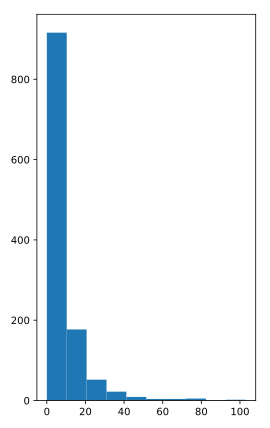

In [1]:
from IPython.display import Image, SVG
SVG(filename='Images/nlp_linelength.svg')

# 2. Simple topic identification
- objective: identify topics from texts based on term frequencies
- methods:
    1. bag-of-words
    2. Tf-idf
- libraries: NLTK, Gensim

## 2.1 Bag-of-words
- basic method for finding topics in a text
- need to first create tokens using tokenization
    - then count up all tokens
- concept: word frequency related to importance
- preprocessing steps:
    - usually may include lower case for all letters

In [19]:
from nltk.tokenize import word_tokenize
from collections import Counter

counter = Counter(word_tokenize(
    """The cat is in the box. The cat likes the box.
    The box is over the cat."""))
print(counter)
# counter object like a dictionary

# return top 2 tokens
counter.most_common(2)

Counter({'The': 3, 'cat': 3, 'the': 3, 'box': 3, '.': 3, 'is': 2, 'in': 1, 'likes': 1, 'over': 1})


[('The', 3), ('cat', 3)]

### 2.1.a Building a Counter with bag-of-words
In this exercise, you'll build your first (in this course) bag-of-words counter using a Wikipedia article, which has been pre-loaded as article. Try doing the bag-of-words without looking at the full article text, and guessing what the topic is! If you'd like to peek at the title at the end, we've included it as article_title. Note that this article text has had very little preprocessing from the raw Wikipedia database entry.

word_tokenize has been imported for you.

In [ ]:
# Import Counter
from collections import Counter

# Tokenize the article: tokens
tokens = word_tokenize(article)

# Convert the tokens into lowercase: lower_tokens
lower_tokens = [t.lower() for t in tokens]

# Create a Counter with the lowercase tokens: bow_simple
bow_simple = Counter(lower_tokens)

# Print the 10 most common tokens
print(bow_simple.most_common(10))

# [(',', 151), ('the', 150), ('.', 89), ('of', 81), ("''", 68), 
#  ('to', 63), ('a', 60), ('in', 44), ('and', 41), ('(', 40)]

## 2.2 Simple text preprocessing
Preprocessing:
- tokenization to create a bag of words
- lowercasing words
- Lemmatization/Stemming = shorten words to their root systems
    - make plural words singular
- Remove
    - stop words - ie. and, the
    - punctuation
    - unwanted tokens
    
Try some different methods and evaluate.

In [20]:
# Text preprocessing with Python

from nltk.corpus import stopwords

text = """The cat is in the box. The cat likes the box.
    The box is over the cat."""

# list comprehension to tokenize sentences, 
# only use alphabet characters
tokens = [w for w in word_tokenize(text.lower()) if w.isalpha()]

# remove stop words
no_stops = [t for t in tokens if t not in stopwords.words('english')]

# print 2 most common words after preprocessing
Counter(no_stops).most_common(2)

[('cat', 3), ('box', 3)]

### 2.2.a Text preprocessing practice
Now, it's your turn to apply the techniques you've learned to help clean up text for better NLP results. You'll need to remove stop words and non-alphabetic characters, lemmatize, and perform a new bag-of-words on your cleaned text.

You start with the same tokens you created in the last exercise: lower_tokens. You also have the Counter class imported.
- Create another list called no_stops in which you remove all stop words, which are held in a list called english_stops.

In [21]:
# list of english stop words
english_stops = ['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 'her',
 'hers',
 'herself',
 'it',
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each',
 'few',
 'more',
 'most',
 'other',
 'some',
 'such',
 'no',
 'nor',
 'not',
 'only',
 'own',
 'same',
 'so',
 'than',
 'too',
 'very',
 's',
 't',
 'can',
 'will',
 'just',
 'don',
 'should',
 'now',
 'd',
 'll',
 'm',
 'o',
 're',
 've',
 'y',
 'ain',
 'aren',
 'couldn',
 'didn',
 'doesn',
 'hadn',
 'hasn',
 'haven',
 'isn',
 'ma',
 'mightn',
 'mustn',
 'needn',
 'shan',
 'shouldn',
 'wasn',
 'weren',
 'won',
 'wouldn',
 '']

In [ ]:
# text preprocessing: remove stop words, non-alpha characters,
# lemmatize, and perform bag-of-words

# Import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer

# Retain alphabetic words: alpha_only
alpha_only = [t for t in lower_tokens if t.isalpha()]

# Remove all stop words: no_stops
no_stops = [t for t in alpha_only if t not in english_stops]

# Instantiate the WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

# Lemmatize all tokens into a new list: lemmatized
lemmatized = [wordnet_lemmatizer.lemmatize(t) for t in no_stops]

# Create the bag-of-words: bow
bow = Counter(lemmatized)

# Print the 10 most common tokens
print(bow.most_common(10))

# output
# [('debugging', 40), ('system', 25), ('software', 16), 
#  ('bug', 16), ('problem', 15), ('tool', 15), ('computer', 14), 
#  ('term', 13), ('process', 13), ('used', 12)]

## 2.3 gensim
What is gensim?
- popular open-source NLP library
- uses top academic models to perform complex tasks
    - building document or word vectors
    - performing topic identification and document comparison

Other notes:
- LDA used for topic analysis and modeling

Examples of word vector (visuals work better)
- male-female
- verb tense: walking-walked
- country-capital: Spain-Madrid

corpus/corpora = set of texts used to perform NLP tasks

Note:
- gensim models can be easily saved, updated, and reused
    - AWESOME!!!
- our dictionary can also be updated
    - with new texts
    - words that meet certain thresholds
    - then use for feature exercises

### 2.3.a Create a gensim dictionary and corpus

In [ ]:
from gensim.corpora.dictionary import Dictionary
from nltk.tokenize import word_tokenize

# documents contain movie reviews
my_documents = ['The movie was about a spaceship and aliens.',
                'I really liked the movie!',
                'Awesome action scenes, but boring characters.',
                'The movie was awful! I hate alien films.',
                'Space is cool! I liked the movie.',
                'More space films, please!'
               ]

# simple brief example tokenizing and lowercase
tokenized_docs = [word_tokenize(doc.lower()) for doc in my_documents]
# should also remove punctuation and stop words

# start corpus: use Dictionary class to map id to each token
dictionary = Dictionary(tokenized_docs)

# look at token and id
dictionary.token2id

# create a gensim corpus
corpus = [dictionary.doc2bow(doc) for doc in tokenized_docs]

# view corpus - a list of lists, each list item is 1 document
# form: (id, frequency)

### 2.3.b Example: Creating and querying a corpus with gensim
It's time to apply the methods you learned in the previous video to create your first gensim dictionary and corpus!

You'll use these data structures to investigate word trends and potential interesting topics in your document set. To get started, we have imported a few additional messy articles from Wikipedia, which were preprocessed by lowercasing all words, tokenizing them, and removing stop words and punctuation. These were then stored in a list of document tokens called articles. You'll need to do some light preprocessing and then generate the gensim dictionary and corpus.

Notes:
- Obtain the id for "computer" from dictionary. To do this, use its .token2id method which returns ids from text, and then chain .get() which returns tokens from ids. Pass in "computer" as an argument to .get().
- Use a list comprehension in which you iterate over articles to create a gensim MmCorpus from dictionary.
    - In the output expression, use the .doc2bow() method on dictionary with article as the argument.

In [ ]:
# Import Dictionary
from gensim.corpora.dictionary import Dictionary

# Create a Dictionary from the articles: dictionary
dictionary = Dictionary(articles)

# Select the id for "computer": computer_id
computer_id = dictionary.token2id.get("computer")

# Use computer_id with the dictionary to print the word
print(dictionary.get(computer_id))

# Create a MmCorpus: corpus
corpus = [dictionary.doc2bow(article) for article in articles]

# Print the first 10 word ids with their frequency counts from 
# the fifth document
print(corpus[4][:10])

# output
# computer
# [(0, 88), (23, 11), (24, 2), (39, 1), (41, 2), (55, 22), (56, 1), 
#  (57, 1), (58, 1), (59, 3)]

### 2.3.c Gensim bag-of-words
Now, you'll use your new gensim corpus and dictionary to see the most common terms per document and across all documents. You can use your dictionary to look up the terms. Take a guess at what the topics are and feel free to explore more documents in the IPython Shell!

You have access to the dictionary and corpus objects you created in the previous exercise, as well as the Python defaultdict and itertools to help with the creation of intermediate data structures for analysis.

The fifth document from corpus is stored in the variable doc, which has been sorted in descending order.

Notes:
- Print the top five words of bow_doc using each word_id with the dictionary alongside word_count. The word_id can be accessed using the .get() method of dictionary.
- Create a defaultdict called total_word_count in which the keys are all the token ids (word_id) and the values are the sum of their occurrence across all documents (word_count). Remember to specify int when creating the defaultdict, and inside the for loop, increment each word_id of total_word_count by word_count.
- Create a sorted list from the defaultdict, using words across the entire corpus. To achieve this, use the .items() method on total_word_count inside sorted().
- Similar to how you printed the top five words of bow_doc earlier, print the top five words of sorted_word_count as well as the number of occurrences of each word across all the documents.

In [ ]:
# Save the fifth document: doc
doc = corpus[4]

# Sort the doc for frequency: bow_doc
bow_doc = sorted(doc, key=lambda w: w[1], reverse=True)

# Print the top 5 words of the document alongside the count
for word_id, word_count in bow_doc[:5]:
    print(dictionary.get(word_id), word_count)
    
# Create the defaultdict: total_word_count
total_word_count = defaultdict(int)
for word_id, word_count in itertools.chain.from_iterable(corpus):
    total_word_count[word_id] += word_count

# Create a sorted list from the defaultdict: sorted_word_count
sorted_word_count = sorted(total_word_count.items(), 
                           key=lambda w: w[1], reverse=True) 

# Print the top 5 words across all documents alongside the count
for word_id, word_count in sorted_word_count[:5]:
    print(dictionary.get(word_id), word_count)

# output
# engineering 91
# '' 88
# reverse 71
# software 51
# cite 26

# '' 1042
# computer 594
# software 450
# `` 345
# cite 322

## 2.4 Tf-idf with gensim
What is tf-idf?
- tf-idf = Term frequency - inverse document frequency
- determines the most important words in each document in corpus
- Each corpus may have shared word beyond just stopwords
    - These word should be down-weighted in importance
    - ie. example from astronomy: downgrade the word "Sky"
- Ensures most common words don't show up as key words
- keeps document specific frequent word weighted high

Tf-idf formula
- weight will be low if the term is not frequent in the document
- weight will also be low if logarithm is close to 0

In [ ]:
from gensim.models.tfidfmodel import TfidModel

# use bag of words corpus and translate to TfidfModel
tfidf = TfidfModel(corpus)

# reference each document like a dictionary
# displays [(token_id, token_weights)]
tfidf[corpus[1]]

### 2.4.a What is tf-idf?
You want to calculate the tf-idf weight for the word "computer", which appears five times in a document containing 100 words. Given a corpus containing 200 documents, with 20 documents mentioning the word "computer", tf-idf can be calculated by multiplying term frequency with inverse document frequency.

- Term frequency = percentage share of the word compared to all tokens in the document 
- Inverse document frequency = logarithm of the total number of documents in a corpora divided by the number of documents containing the term

Which of the below options is correct?
- Answer: (5 / 100) * log(200 / 20)

### 2.4.b Tf-idf with Wikipedia
Now it's your turn to determine new significant terms for your corpus by applying gensim's tf-idf. You will again have access to the same corpus and dictionary objects you created in the previous exercises - dictionary, corpus, and doc. Will tf-idf make for more interesting results on the document level?
- Use doc to calculate the weights. You can do this by passing [doc] to tfidf

In [ ]:
# Import TfidfModel
from gensim.models.tfidfmodel import TfidfModel

# Create a new TfidfModel using the corpus: tfidf
tfidf = TfidfModel(corpus)

# Calculate the tfidf weights of doc: tfidf_weights
tfidf_weights = tfidf[doc]

# Print the first five weights
print(tfidf_weights[:5])

# output
# [(24, 0.0022836332291091273), (39, 0.0043409401554717324), 
#  (41, 0.008681880310943465), (55, 0.011988285029371418), 
#  (56, 0.005482756770026296)]

# Sort the weights from highest to lowest: sorted_tfidf_weights
sorted_tfidf_weights = sorted(tfidf_weights, 
                              key=lambda w: w[1], 
                              reverse=True)

# Print the top 5 weighted words
for term_id, weight in sorted_tfidf_weights[:5]:
    print(dictionary.get(term_id), weight)
    
# output
# reverse 0.4884961428651127
# infringement 0.18674529210288995
# engineering 0.16395041814479536
# interoperability 0.12449686140192663
# reverse-engineered 0.12449686140192663

# 3. Named-entity recognition (NER)
Objective:
- learn how to identify the who, what and where of your texts using pre-trained models on English and non-English text

Libraries: polyglot, spaCy

What is Named Entity Recognition?
- NLP task to identify important named entities in the text
    - people, places, organizations
    - dates, states, works of art
    - ... other categories
- Can be used alongside topic identification
    - or on its own
- Who? What? When? Where?

nltk and the Stanford CoreNLP library
- The Stanford CoreNLP library:
    - integrated into Python via nltk
    - Java based
    - support for NER as well as conference and dependency trees
- When using the Stanford library with NLTK, what is needed to get started?
    - NLTK, the Stanford Java Libraries and some environment variables to help with integration.

## 3.1 Using nltk for Named Entity Recognition

In [25]:
import nltk

sentence = '''In New York, I like to reide the Metro to visit MOMA
and some restaurants rated well by Ruth Reichl.'''

# preprocessing: tokenization
tokenized_sent = nltk.word_tokenize(sentence)
# tag for parts of speech
tagged_sent = nltk.pos_tag(tokenized_sent)
# ie. NNP = proper noun singular
print('view tags for parts of speech', tagged_sent[:3], '\n')

# nltk's ne_chunk() (aka named entity chunk)
# Returns sentence as a tree representing grammar
print(nltk.ne_chunk(tagged_sent))

view tags for parts of speech [('In', 'IN'), ('New', 'NNP'), ('York', 'NNP')] 

(S
  In/IN
  (GPE New/NNP York/NNP)
  ,/,
  I/PRP
  like/VBP
  to/TO
  reide/VB
  the/DT
  (ORGANIZATION Metro/NNP)
  to/TO
  visit/VB
  (ORGANIZATION MOMA/NNP)
  and/CC
  some/DT
  restaurants/NNS
  rated/VBN
  well/RB
  by/IN
  (PERSON Ruth/NNP Reichl/NNP)
  ./.)


### 3.1.a NER with NLTK
You're now going to have some fun with named-entity recognition! A scraped news article has been pre-loaded into your workspace. Your task is to use nltk to find the named entities in this article.

What might the article be about, given the names you found?

Along with nltk, sent_tokenize and word_tokenize from nltk.tokenize have been pre-imported.

Notes
- Chunk each tagged sentence into named-entity chunks using nltk.ne_chunk_sents(). Along with pos_sentences, specify the additional keyword argument binary=True.
- Loop over each sentence and each chunk, and test whether it is a named-entity chunk by testing if it has the attribute label, and if the chunk.label() is equal to "NE". If so, print that chunk.

In [ ]:
# Tokenize the article into sentences: sentences
sentences = nltk.sent_tokenize(article)

# Tokenize each sentence into words: token_sentences
token_sentences = [nltk.word_tokenize(sent) for sent in sentences]

# Tag each tokenized sentence into parts of speech: pos_sentences
pos_sentences = [nltk.pos_tag(sent) for sent in token_sentences] 

# Create the named entity chunks: chunked_sentences
chunked_sentences = nltk.ne_chunk_sents(pos_sentences, binary=True)

# Test for stems of the tree with 'NE' tags
for sent in chunked_sentences:
    for chunk in sent:
        if hasattr(chunk, "label") and chunk.label() == "NE":
            print(chunk)

# output
# (NE Uber/NNP)
# (NE Beyond/NN)
# (NE Apple/NNP)
# (NE Uber/NNP)
# (NE Uber/NNP)
# (NE Travis/NNP Kalanick/NNP)
# (NE Tim/NNP Cook/NNP)
# (NE Apple/NNP)
# (NE Silicon/NNP Valley/NNP)
# (NE CEO/NNP)
# (NE Yahoo/NNP)
# (NE Marissa/NNP Mayer/NNP)

### 3.1.b Charting practice
In this exercise, you'll use some extracted named entities and their groupings from a series of newspaper articles to chart the diversity of named entity types in the articles.

You'll use a defaultdict called ner_categories, with keys representing every named entity group type, and values to count the number of each different named entity type. You have a chunked sentence list called chunked_sentences similar to the last exercise, but this time with non-binary category names.

You can use hasattr() to determine if each chunk has a 'label' and then simply use the chunk's .label() method as the dictionary key.

Notes:
- Fill up the dictionary with values for each of the keys. Remember, the keys will represent the label().
    - In the outer for loop, iterate over chunked_sentences, using sent as your iterator variable.
    - In the inner for loop, iterate over sent. If the condition is true, increment the value of each key by 1.
- For the pie chart labels, create a list called labels from the keys of ner_categories, which can be accessed using .keys().
- Use a list comprehension to create a list called values, using the .get() method on ner_categories to compute the values of each label l.
- Use plt.pie() to create a pie chart for each of the NER categories. Along with values and labels=labels, pass the extra keyword arguments autopct='%1.1f%%' and startangle=140 to add percentages to the chart and rotate the initial start angle.
- Display your pie chart. Was the distribution what you expected?

In [ ]:
# Create the defaultdict: ner_categories
ner_categories = defaultdict(int)

# Create the nested for loop
for sent in chunked_sentences:
    for chunk in sent:
        if hasattr(chunk, 'label'):
            ner_categories[chunk.label()] += 1
            
# Create a list from the dictionary keys for the chart labels: labels
labels = list(ner_categories.keys())

# Create a list of the values: values
values = [ner_categories.get(l) for l in labels]

# Create the pie chart
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)

# Display the chart
plt.show()

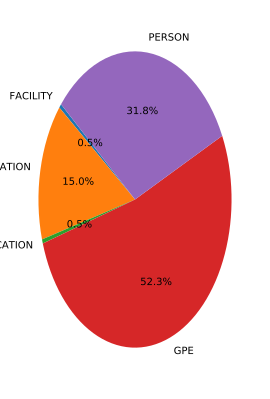

In [28]:
SVG(filename='Images/nlp_ne_piechart.svg')

## 3.2 ScaCy
What is SpaCy?
- NLP library similar to gensim, with different implementations
- focus on creating NLP pipelines to generate model and corpora
- open-source, with extra libraries and tools
    - displaCy
        - entity recognition visualization tool to view parse trees 
        - which uses Node.js to create interactive text
- also support German and Chinese languages

Why use SpaCy for NER?
- easy pipeline creation
- different entity types compared to nltk
- informal language corpora
    - easily find entities in Tweets and chat messages
- Quickly growing - so support may increase

Download notes in Bash for MacOS:
- conda install spacy
- sudo python -m spacy download en

### 3.2.a SpaCy NER

In [32]:
import spacy

nlp = spacy.load('en')

# nlp has several linked objects including entity
# for entity recognition in the text
print(nlp.entity)

# load new document
doc = nlp("""Berlin is the capital of Germany;
and the residence of Chancellor Angela Merkel.""")

# named entities are stored in .ents
print(doc.ents)

# check out each label (.label_) using indexing
print(doc.ents[0], doc.ents[0].label_)

(Berlin, Germany, 
, Angela Merkel)
Berlin GPE


### 3.2.b Comparing NLTK with spaCy NER
Using the same text you used in the first exercise of this chapter, you'll now see the results using spaCy's NER annotator. How will they compare?

The article has been pre-loaded as article. To minimize execution times, you'll be asked to specify the keyword arguments tagger=False, parser=False, matcher=False when loading the spaCy model, because you only care about the entity in this exercise. 

In [ ]:
# Import spacy
import spacy

# Instantiate the English model: nlp
# Additional args to improve execution time
nlp = spacy.load('en', tagger=False, parser=False, 
                 matcher=False)

# Create a new spacy document object: doc
doc = nlp(article)

# Print all of the found entities and their labels
for ent in doc.ents:
    print(ent.label_, ent.text)

output:
    ORG Uber
    ORG Uber
    ORG Apple
    ORG Uber
    ORG Uber
    PERSON Travis Kalanick
    ORG Uber
    PERSON Tim Cook
    ORG Apple
    CARDINAL Millions
    ORG Uber
    GPE drivers’
    LOC Silicon Valley’s
    ORG Yahoo
    PERSON Marissa Mayer
    MONEY $186m

### 3.2.c spaCy NER Categories
Which are the extra categories that spacy uses compared to nltk in its named-entity recognition?

Answer: NORP, CARDINAL, MONEY, WORKOFART, LANGUAGE, EVENT

## 3.3 Multilingual NER with polyglot
What is polyglot?
- NLP library which uses word vectors for simple tasks (ie NER)
- Why polyglot?
    - vectors for many different languages
    - 130+ languages
    - transliteration = translate text by swapping characters
- other features
    - uses language detection, so don't need to specify language
    
Installation - polyglot
- pip install polyglot
    - if issues, click [here](https://hackernoon.com/install-polyglot-on-mac-3c90445abc1f)
    - install icu with directions [here](https://anaconda.org/conda-forge/icu)
    - conda install -c conda-forge pyicu
- can't get pycld2 running

### 3.3.a Spanish NER with polyglot

In [46]:
from polyglot.text import Text

text = """El presidente de la Generalitat de Cataluña,
Carles Puigdemont, ha afirmado hoy a la alcaldesa
de Madrid, Manuela Carmena, que en su etapa de
alcalde de Girona (de julio de 2011 a enero de 2016
hizo una gran promoción de Madrid."""

ptext = Text(text)

# view entity chunks
# I-ORG = organization, I-LOC = location, I-PER = person
ptext.entities

# may need to clean up entities when they don't match 
# expectations or you don't want to track them

ModuleNotFoundError: No module named 'pycld2'

### 3.3.b French NER with polyglot I
In this exercise and the next, you'll use the polyglot library to identify French entities. The library functions slightly differently than spacy, so you'll use a few of the new things you learned in the last video to display the named entity text and category.

You have access to the full article string in article. Additionally, the Text class of polyglot has been imported from polyglot.text.

In [ ]:
# Create a new text object using Polyglot's Text class: txt
txt = Text(article)

# Print each of the entities found
for ent in txt.entities:
    print(ent)
    
# Print the type of ent
print(type(ent))

output:
    ['Charles', 'Cuvelliez']
    ['Charles', 'Cuvelliez']
    ['Bruxelles']
    ['l’IA']
    ['Julien', 'Maldonato']
    ['Deloitte']
    ['Ethiquement']
    ['l’IA']
    ['.']
    <class 'polyglot.text.Chunk'>

### 3.3.c French NER with polyglot II
Here, you'll complete the work you began in the previous exercise.

Your task is to use a list comprehension to create a list of tuples, in which the first element is the entity tag, and the second element is the full string of the entity text.

In [ ]:
# Create the list of tuples: entities
entities = [(ent.tag, ' '.join(ent)) for ent in txt.entities]

# Print entities
print(entities)

### 3.3.d Spanish NER with polyglot - using blog-like texts
You'll continue your exploration of polyglot now with some Spanish annotation. This article is not written by a newspaper, so it is your first example of a more blog-like text. How do you think that might compare when finding entities?

The Text object has been created as txt, and each entity has been printed, as you can see in the IPython Shell.

Your specific task is to determine how many of the entities contain the words "Márquez" or "Gabo" - these refer to the same person in different ways!

In [ ]:
# Initialize the count variable: count
count = 0

# Iterate over all the entities
for ent in txt.entities:
    # Check whether the entity contains 'Márquez' or 'Gabo'
    if "Márquez" in ent or "Gabo" in ent:
        # Increment count
        count += 1

# Print count
print(count)

# Calculate the percentage of entities that refer to "Gabo": percentage
percentage = count / len(txt.entities)
print(percentage)


output:
    29
    0.29591836734693877

# 4. Building a "fake news" classifier
- apply lessons to build a supervised ML model to detect "fake news"
    - choose a few important features and test ideas to identify and classify "fake news" articles

## 4.1 Supervised learning with NLP
How to create supervised learning data from text
- use bag-of-words models or tf-idf as features

Example
- IMDB Movie Dataset
- Goal: Predict movie genre based on plot summary (text)
- Categorical features generated using preprocessing
- Target label: Sci-Fi and Action are 0 or 1, opposite genres


## 4.2 Predicting movie genre
- Goal: Create bag-of-word vectors for the movie plots
    - can we predict genre based on the words used in the plot summary?
    

## 4.3 Count Vectorizer with Python
- bag-of-words vector

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
# load data into a dataframe
df = ...
# set target label
y = df['Sci-Fi']
X_train, X_test, y_train, y_test = train_test_split(
df['plot'], y, test_size=0.33, random_state=53)

# create a count vectorizer and remove stop_words
count_vectorizer = CountVectorizer(stop_words='english')
# create bag-of-words vectors on train/test sets
# fit_transform will create a bag-of-words dictionary 
#  and vectors for each document
count_train = count_vectorizer.fit_transform(X_train.values)
count_test = count_vectorizer.transform(X_test.values)
# note: if you have unknown words in test set only, may
#  need more data or remove those words from the test dataset

### 4.3.1 CountVectorizer for text classification
- simple supervised model using a sparse text vectorizer

It's time to begin building your text classifier! The [data](https://s3.amazonaws.com/assets.datacamp.com/production/course_3629/fake_or_real_news.csv) has been loaded into a DataFrame called df. Explore it in the IPython Shell to investigate what columns you can use. The .head() method is particularly informative.

In this exercise, you'll use pandas alongside scikit-learn to create a sparse text vectorizer you can use to train and test a simple supervised model. To begin, you'll set up a CountVectorizer and investigate some of its features.

In [ ]:
# Import the necessary modules
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

# Print the head of df
print(df.head())

# Create a series to store the labels: y
y = df['label']

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    df['text'], y, test_size=0.33, random_state=53)

# Initialize a CountVectorizer object: count_vectorizer
count_vectorizer = CountVectorizer(stop_words='english')

# Transform the training data using only the 'text' column 
#  values: count_train 
count_train = count_vectorizer.fit_transform(X_train.values)

# Transform the test data using only the 'text' column values:
#  count_test 
count_test = count_vectorizer.transform(X_test.values)

# Print the first 10 features of the count_vectorizer
print(count_vectorizer.get_feature_names()[:10])


output:
       Unnamed: 0                                              title  \
    0        8476                       You Can Smell Hillary’s Fear   
    1       10294  Watch The Exact Moment Paul Ryan Committed Pol...   
    2        3608        Kerry to go to Paris in gesture of sympathy   
    3       10142  Bernie supporters on Twitter erupt in anger ag...   
    4         875   The Battle of New York: Why This Primary Matters   
    
                                                    text label  
    0  Daniel Greenfield, a Shillman Journalism Fello...  FAKE  
    1  Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE  
    2  U.S. Secretary of State John F. Kerry said Mon...  REAL  
    3  — Kaydee King (@KaydeeKing) November 9, 2016 T...  FAKE  
    4  It's primary day in New York and front-runners...  REAL  
    ['00', '000', '0000', '00000031', '000035', '00006', '0001', '0001pt', '000ft', '000km']

## 4.4 TfidfVectorizer for text classification
Similar to the sparse CountVectorizer created in the previous exercise, you'll work on creating tf-idf vectors for your documents. You'll set up a TfidfVectorizer and investigate some of its features.

In this exercise, you'll use pandas and sklearn along with the same X_train, y_train and X_test, y_test DataFrames and Series you created in the last exercise.

In [ ]:
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize a TfidfVectorizer object: tfidf_vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', 
                                   max_df=0.7)

# Transform the training data: tfidf_train 
tfidf_train = tfidf_vectorizer.fit_transform(X_train.values)

# Transform the test data: tfidf_test 
tfidf_test = tfidf_vectorizer.transform(X_test.values)

# Print the first 10 features
print(tfidf_vectorizer.get_feature_names()[:10])

# Print the first 5 vectors of the tfidf training data
print(tfidf_train.A[:5])

output:
- ['00', '000', '0000', '000billion', '000ft', '004', '006s', '0099', '00am', '01']
-     [[0. 0. 0. ... 0. 0. 0.]
-     [0. 0. 0. ... 0. 0. 0.]
-     [0. 0. 0. ... 0. 0. 0.]
-     [0. 0. 0. ... 0. 0. 0.]
-     [0. 0. 0. ... 0. 0. 0.]]

### 4.4.a Inspecting the vectors
To get a better idea of how the vectors work, you'll investigate them by converting them into pandas DataFrames.

Here, you'll use the same data structures you created in the previous two exercises (count_train, count_vectorizer, tfidf_train, tfidf_vectorizer) as well as pandas, which is imported as pd.

In [ ]:
# Create the CountVectorizer DataFrame: count_df
count_df = pd.DataFrame(count_train.A, 
                        columns=count_vectorizer.get_feature_names())

# Create the TfidfVectorizer DataFrame: tfidf_df
tfidf_df = pd.DataFrame(tfidf_train.A, 
                        columns=tfidf_vectorizer.get_feature_names())

# Print the head of count_df
print(count_df.head())

# Print the head of tfidf_df
print(tfidf_df.head())

# Calculate the difference in columns: difference
difference = set(count_df.columns) - set(tfidf_df.columns)
print(difference)

# Check whether the DataFrames are equal
print(count_df.equals(tfidf_df))


output:
       00  000  02  03  06  10  100  1040s  11  11pm   ...    yves  zabadani  \
    0   0    0   0   0   0   0    0      0   0     0   ...       0         0   
    1   0    0   0   0   0   0    0      0   0     0   ...       0         0   
    2   0    0   0   0   0   0    0      0   0     0   ...       0         0   
    3   0    0   0   0   0   0    0      0   0     0   ...       0         0   
    4   0    0   0   0   0   0    1      0   0     0   ...       0         0   
    
       zaniest  zany  zelaya  zero  zone  zoom  zooming  zuesse  
    0        0     0       0     0     0     0        0       0  
    1        0     0       0     0     0     0        0       0  
    2        0     0       0     0     0     0        0       0  
    3        0     0       0     0     0     0        0       1  
    4        0     0       0     3     0     0        0       0  
    
    [5 rows x 6446 columns]
        00  000   02   03   06   10       100  1040s   11  11pm    ...     yves  \
    0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000    0.0  0.0   0.0    ...      0.0   
    1  0.0  0.0  0.0  0.0  0.0  0.0  0.000000    0.0  0.0   0.0    ...      0.0   
    2  0.0  0.0  0.0  0.0  0.0  0.0  0.000000    0.0  0.0   0.0    ...      0.0   
    3  0.0  0.0  0.0  0.0  0.0  0.0  0.000000    0.0  0.0   0.0    ...      0.0   
    4  0.0  0.0  0.0  0.0  0.0  0.0  0.039568    0.0  0.0   0.0    ...      0.0   
    
       zabadani  zaniest  zany  zelaya      zero  zone  zoom  zooming    zuesse  
    0       0.0      0.0   0.0     0.0  0.000000   0.0   0.0      0.0  0.000000  
    1       0.0      0.0   0.0     0.0  0.000000   0.0   0.0      0.0  0.000000  
    2       0.0      0.0   0.0     0.0  0.000000   0.0   0.0      0.0  0.000000  
    3       0.0      0.0   0.0     0.0  0.000000   0.0   0.0      0.0  0.046812  
    4       0.0      0.0   0.0     0.0  0.137944   0.0   0.0      0.0  0.000000  
    
    [5 rows x 6445 columns]
    {'time'}
    False

## 4.5 Training and Testing a classification model with sklearn

### 4.5.a Naive Bayes Classifier
Naive Bayes Model
- commonly used for testing NLP classification problems
- basis in probability

Question: Given a particular piece of data, how likely is a particular outcome?

Examples:
- If a movie plot has a spaceship, how likely is it sci-fi?
- Given a spaceship AND an alien, how likely NOW is it sci-fi?

Each word from CountVectorizer acts as a feature

Naive Bayes - simple and effective
- not always the best
- sklearn's MultinomialNB works well with CountVectorizer
    - this model works well with integers
    - would NOT work well with float type like tf-idf weighted inputs - linear models and SVM may be better
    
Confusion matrix
- if labels aren't passed, it will use Python ordering

In [ ]:
# Naive Bayes - MultinomialNB works well with CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

nb_classifier = MultinomialNB()
nb_classifier.fit(count_train, y_train)
pred = nb_classifier.predict(count_test)
metrics.accuracy_score(y_test, pred)

# confusion matrix
metrics.confusion_matrix(y_test, pred, labels=[0,1])
# output
# array([[6410, 563],
#        [864,  2242]])

# notice data is skewed to Action movie genre
# Maybe that's why Action movies are predicted more accurately

### 4.5.b Training and testing the "fake news" model with CountVectorizer
Now it's your turn to train the "fake news" model using the features you identified and extracted. In this first exercise you'll train and test a Naive Bayes model using the CountVectorizer data.

The training and test sets have been created, and count_vectorizer, count_train, and count_test have been computed.

In [ ]:
# Import the necessary modules
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB

# Instantiate a Multinomial Naive Bayes classifier: nb_classifier
nb_classifier = MultinomialNB()

# Fit the classifier to the training data
nb_classifier.fit(count_train, y_train)

# Create the predicted tags: pred
pred = nb_classifier.predict(count_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test, pred)
print(score)

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test, pred, 
                              labels=['FAKE','REAL'])
print(cm)


In [ ]:
# output:
#     0.893352462936394
#     [[ 865  143]
#      [  80 1003]]

### 4.5.c Training and testing the "fake news" model with TfidfVectorizer
Now that you have evaluated the model using the CountVectorizer, you'll do the same using the TfidfVectorizer with a Naive Bayes model.

The training and test sets have been created, and tfidf_vectorizer, tfidf_train, and tfidf_test have been computed. Additionally, MultinomialNB and metrics have been imported from, respectively, sklearn.naive_bayes and sklearn.

In [ ]:
# Create a Multinomial Naive Bayes classifier: nb_classifier
nb_classifier = MultinomialNB()

# Fit the classifier to the training data
nb_classifier.fit(tfidf_train, y_train)

# Create the predicted tags: pred
pred = nb_classifier.predict(tfidf_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test, pred)
print(score)

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test, pred, 
                              labels=['FAKE','REAL'])
print(cm)


In [ ]:
# output:
#     0.8565279770444764
#     [[ 739  269]
#      [  31 1052]]

## 4.6 Simple NLP, Complex Problems
Translation
- a work in progress
- example: German has many related words to economics that in English the vectors point to 'economics'

Sentiment Analysis
- complex problems with snark, sarcasm
- difficulty with negation
    - ie. I liked it, but it could have been better
- separate communities may use the same words differently
    - ie. https://nlp.stanford.edu/projects/socialsent/
    - 2 different reddit communities: TwoX for women and Sports

Language Biases
- prejudices in text
- English to Turkish to English
    - She and He can get switched


## 4.7 Ways to improve the model
1. Tweaking alpha levels
2. Trying a new classification model
3. Training on a larger dataset
4. Improving text preprocessing


## 4.8 Improving your model - hyperparameter alpha
Your job in this exercise is to test a few different alpha levels using the Tfidf vectors to determine if there is a better performing combination.

The training and test sets have been created, and tfidf_vectorizer, tfidf_train, and tfidf_test have been computed.

Uses a function to check accuracy for different alpha values
- try GridSearch instead

In [ ]:
# Create the list of alphas: alphas
alphas = np.arange(0,1,0.1)

# Define train_and_predict()
def train_and_predict(alpha):
    # Instantiate the classifier: nb_classifier
    nb_classifier = MultinomialNB(alpha=alpha)
    # Fit to the training data
    nb_classifier.fit(tfidf_train, y_train)
    # Predict the labels: pred
    pred = nb_classifier.predict(tfidf_test)
    # Compute accuracy: score
    score = metrics.accuracy_score(y_test, pred)
    return score

# Iterate over the alphas and print the corresponding score
for alpha in alphas:
    print('Alpha: ', alpha)
    print('Score: ', train_and_predict(alpha))
    print()

In [ ]:
Alpha:  0.0
Score:  0.8813964610234337

Alpha:  0.1
Score:  0.8976566236250598

Alpha:  0.2
Score:  0.8938307030129125

Alpha:  0.30000000000000004
Score:  0.8900047824007652

Alpha:  0.4
Score:  0.8857006217120995

Alpha:  0.5
Score:  0.8842659014825442

Alpha:  0.6000000000000001
Score:  0.874701099952176

Alpha:  0.7000000000000001
Score:  0.8703969392635102

Alpha:  0.8
Score:  0.8660927785748446

Alpha:  0.9
Score:  0.8589191774270684

## 4.9 Inspecting your model
Now that you have built a "fake news" classifier, you'll investigate what it has learned. You can map the important vector weights back to actual words using some simple inspection techniques.

You have your well performing tfidf Naive Bayes classifier available as nb_classifier, and the vectors as tfidf_vectorizer.

In [ ]:
# Get the class labels: class_labels
class_labels = nb_classifier.classes_

# Extract the features: feature_names
feature_names = tfidf_vectorizer.get_feature_names()

# Zip the feature names together with the coefficient array and sort by weights: feat_with_weights
feat_with_weights = sorted(zip(nb_classifier.coef_[0], feature_names))

# Print the first class label and the top 20 feat_with_weights entries
print(class_labels[0], feat_with_weights[:20])

# Print the second class label and the bottom 20 feat_with_weights entries
print(class_labels[1], feat_with_weights[-20:])


In [ ]:
FAKE [(-12.641778440826338, '0000'), 
      (-12.641778440826338, '000035'), 
      (-12.641778440826338, '0001'), 
      (-12.641778440826338, '0001pt'), 
      (-12.641778440826338, '000km'), 
      (-12.641778440826338, '0011'), 
      (-12.641778440826338, '006s'), 
      (-12.641778440826338, '007'), 
      (-12.641778440826338, '007s'), 
      (-12.641778440826338, '008s'), 
      (-12.641778440826338, '0099'), 
      (-12.641778440826338, '00am'), 
      (-12.641778440826338, '00p'), 
      (-12.641778440826338, '00pm'), 
      (-12.641778440826338, '014'), 
      (-12.641778440826338, '015'), 
      (-12.641778440826338, '018'), 
      (-12.641778440826338, '01am'), 
      (-12.641778440826338, '020'), 
      (-12.641778440826338, '023')]
REAL [(-6.790929954967984, 'states'), 
      (-6.765360557845786, 'rubio'), 
      (-6.751044290367751, 'voters'), 
      (-6.701050756752027, 'house'), 
      (-6.695547793099875, 'republicans'), 
      (-6.6701912490429685, 'bush'), 
      (-6.661945235816139, 'percent'), 
      (-6.589623788689862, 'people'), 
      (-6.559670340096453, 'new'), 
      (-6.489892292073901, 'party'), 
      (-6.452319082422527, 'cruz'), 
      (-6.452076515575875, 'state'), 
      (-6.397696648238072, 'republican'), 
      (-6.376343060363355, 'campaign'), 
      (-6.324397735392007, 'president'), 
      (-6.2546017970213645, 'sanders'), 
      (-6.144621899738043, 'obama'), 
      (-5.756817248152807, 'clinton'), 
      (-5.596085785733112, 'said'), 
      (-5.357523914504495, 'trump')]